### Author : Ibrahim Sobh
## Wine Quality Data Set project

### I - Create Session and Read Data

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('WineQuality').getOrCreate()

red_wine_master = spark.read.option("delimiter", ";").csv("Data/winequality-red.csv",header=True,inferSchema=True)

In [2]:
red_wine_master.show()

+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+
|fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density|  pH|sulphates|alcohol|quality|
+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+
|          7.4|             0.7|        0.0|           1.9|    0.076|               11.0|                34.0| 0.9978|3.51|     0.56|    9.4|      5|
|          7.8|            0.88|        0.0|           2.6|    0.098|               25.0|                67.0| 0.9968| 3.2|     0.68|    9.8|      5|
|          7.8|            0.76|       0.04|           2.3|    0.092|               15.0|                54.0|  0.997|3.26|     0.65|    9.8|      5|
|         11.2|            0.28|       0.56|           1.9|    0.075|               17.0|           

In [3]:
red_wine_master.printSchema()

root
 |-- fixed acidity: double (nullable = true)
 |-- volatile acidity: double (nullable = true)
 |-- citric acid: double (nullable = true)
 |-- residual sugar: double (nullable = true)
 |-- chlorides: double (nullable = true)
 |-- free sulfur dioxide: double (nullable = true)
 |-- total sulfur dioxide: double (nullable = true)
 |-- density: double (nullable = true)
 |-- pH: double (nullable = true)
 |-- sulphates: double (nullable = true)
 |-- alcohol: double (nullable = true)
 |-- quality: integer (nullable = true)



### II - EDA Exploratory Data Analysis 

   - Input variables (based on physicochemical tests):
   - 1 - fixed acidity
   - 2 - volatile acidity
   - 3 - citric acid
   - 4 - residual sugar
   - 5 - chlorides
   - 6 - free sulfur dioxide
   - 7 - total sulfur dioxide
   - 8 - density
   - 9 - pH
   - 10 - sulphates
   - 11 - alcohol
   
   Output variable (based on sensory data): 
   - 12 - quality (score between 0 and 10)


In [4]:
red_wine_master.toPandas().describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [5]:
name_cols = ['f_acidity','v_acidity','c_acid','r_sugar','chlorides','free_so','totale_so',
           'density','pH','sulphates','alcohol','quality']

red_wine_data=red_wine_master.toDF(*name_cols)

In [6]:
red_wine_data.toPandas().head()

f_acidity  v_acidity  c_acid  r_sugar  chlorides  free_so  totale_so  \
0        7.4       0.70    0.00      1.9      0.076     11.0       34.0   
1        7.8       0.88    0.00      2.6      0.098     25.0       67.0   
2        7.8       0.76    0.04      2.3      0.092     15.0       54.0   
3       11.2       0.28    0.56      1.9      0.075     17.0       60.0   
4        7.4       0.70    0.00      1.9      0.076     11.0       34.0   

   density    pH  sulphates  alcohol  quality  
0   0.9978  3.51       0.56      9.4        5  
1   0.9968  3.20       0.68      9.8        5  
2   0.9970  3.26       0.65      9.8        5  
3   0.9980  3.16       0.58      9.8        6  
4   0.9978  3.51       0.56      9.4        5

In [7]:
from pyspark.sql.functions import col,sum

red_wine_data.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in red_wine_data.columns)).show()


+---------+---------+------+-------+---------+-------+---------+-------+---+---------+-------+-------+
|f_acidity|v_acidity|c_acid|r_sugar|chlorides|free_so|totale_so|density| pH|sulphates|alcohol|quality|
+---------+---------+------+-------+---------+-------+---------+-------+---+---------+-------+-------+
|        0|        0|     0|      0|        0|      0|        0|      0|  0|        0|      0|      0|
+---------+---------+------+-------+---------+-------+---------+-------+---+---------+-------+-------+



In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def show_target_distribution(data, title=""):
    print(data['quality'].value_counts())
    plt.figure(figsize = (8, 5))
    sns.countplot(x = data['quality'])
    plt.xlabel('Quality', size = 12)
    plt.ylabel("Count", size = 12)
    plt.title(title+" Distribution in target variable", size = 12)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


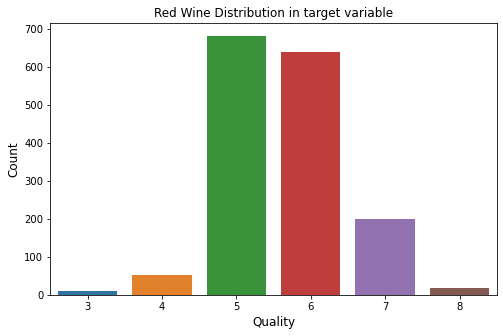

In [9]:
show_target_distribution(red_wine_data.toPandas(),"Red Wine")

In [10]:
def outlier_box_plot(data):
    plt.figure(figsize = (20, 15))
    for i in range (len(data.columns)):
        plt.subplot(2, 6, i+1)
        sns.boxplot(x = data.iloc[:, i])
        plt.xlabel(data.columns[i], size = 12)

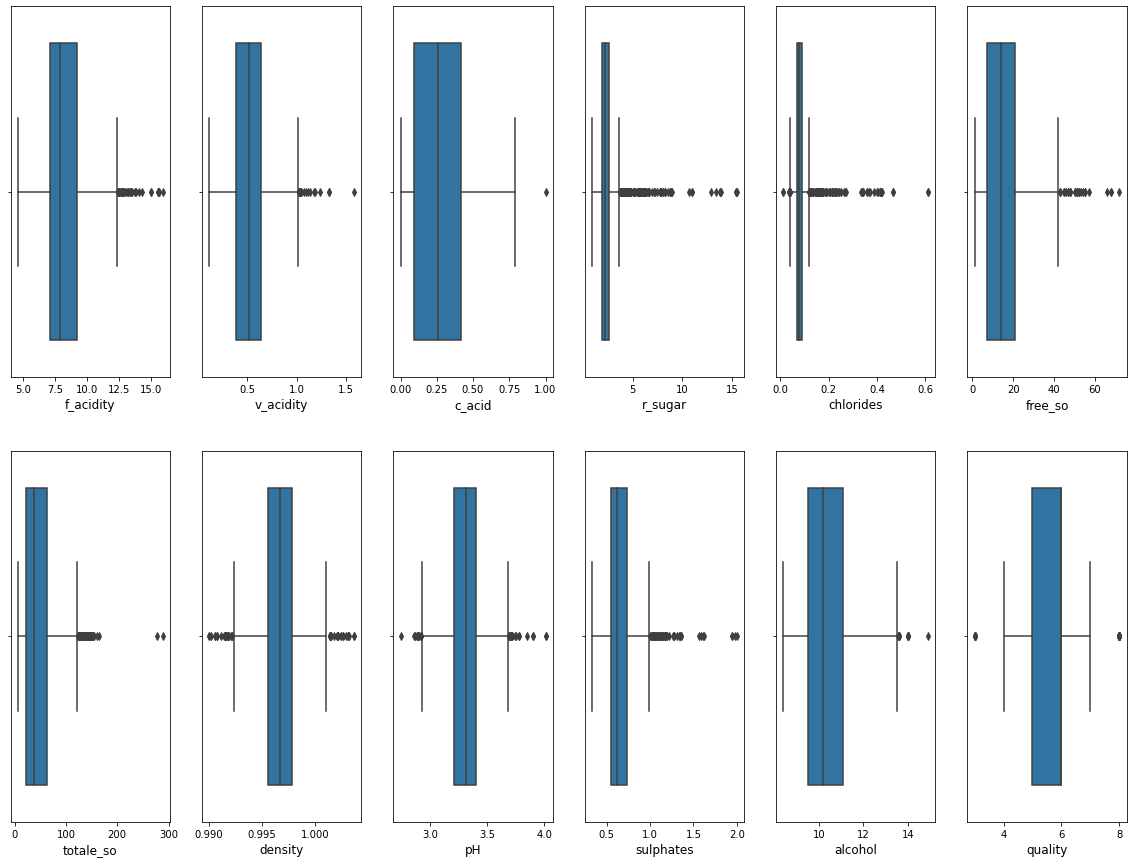

In [11]:
outlier_box_plot(red_wine_data.toPandas())

 ### Note : We can notice the presence of a lot of outliers that need to be eliminated we can use the 'the interquartile range' to catch and remove them

In [12]:
def Outliers(data, feature):
    IQ1 = data[feature].quantile(0.25)
    IQ3 = data[feature].quantile(0.75)
    IQR = IQ3 - IQ1
    
    lower_bound = IQ1 - 1.5 * IQR
    upper_bound = IQ3 + 1.5 * IQR
    
    index = data.index[ (data[feature] < lower_bound) | (data[feature] > upper_bound) ]
    return index

In [13]:
from pyspark.sql.functions import desc, row_number, monotonically_increasing_id
from pyspark.sql.window import Window


def get_outliers_out(data):
    index = []
    for i in data.columns:
        outlier_index=Outliers(data.toPandas(), i)
        index.extend(outlier_index)

    index = set(index)
    print("Total number of outliers are {}".format(len(index)))

    data_with_id = data.withColumn('id', row_number().over(Window.orderBy(monotonically_increasing_id())))

    for idx in index:
        data_with_id=data_with_id.where('id!='+str(idx))

    return data_with_id.drop("id")

In [14]:
red_wine_data=get_outliers_out(red_wine_data)
red_wine_data.toPandas().describe()

Total number of outliers are 420


f_acidity    v_acidity       c_acid      r_sugar    chlorides  \
count  1179.000000  1179.000000  1179.000000  1179.000000  1179.000000   
mean      8.251145     0.524885     0.265785     2.466964     0.086570   
std       1.696362     0.175687     0.192679     1.203319     0.047743   
min       4.600000     0.120000     0.000000     0.900000     0.012000   
25%       7.100000     0.390000     0.090000     1.900000     0.070000   
50%       7.800000     0.520000     0.250000     2.200000     0.079000   
75%       9.100000     0.635000     0.420000     2.600000     0.089000   
max      15.900000     1.330000     1.000000    13.900000     0.611000   

           free_so    totale_so      density           pH    sulphates  \
count  1179.000000  1179.000000  1179.000000  1179.000000  1179.000000   
mean     15.826548    45.639949     0.996675     3.316921     0.653172   
std      10.150116    32.266734     0.001786     0.154101     0.165297   
min       1.000000     6.000000     0.990070     2.740000     0.330000   
25%       8.000000    22.000000     0.995570     3.210000     0.550000   
50%      14.000000    37.000000     0.996700     3.320000     0.620000   
75%      21.000000    61.000000     0.997765     3.405000     0.720000   
max      72.000000   289.000000     1.003200     4.010000     2.000000   

           alcohol      quality  
count  1179.000000  1179.000000  
mean     10.416031     5.627651  
std       1.041884     0.796607  
min       8.400000     3.000000  
25%       9.500000     5.000000  
50%      10.200000     6.000000  
75%      11.000000     6.000000  
max      14.900000     8.000000

In [15]:
print("correlation with the target feature 'quality'")
red_wine_data.toPandas().corrwith(red_wine_data.toPandas()["quality"]).sort_values(ascending=False)

correlation with the target feature 'quality'


quality      1.000000
alcohol      0.463521
sulphates    0.234294
c_acid       0.216467
f_acidity    0.128310
r_sugar      0.013502
free_so     -0.040121
pH          -0.073105
chlorides   -0.124364
totale_so   -0.191272
density     -0.192416
v_acidity   -0.382497
dtype: float64

Text(0.5, 1.0, 'Correlation Matrix')

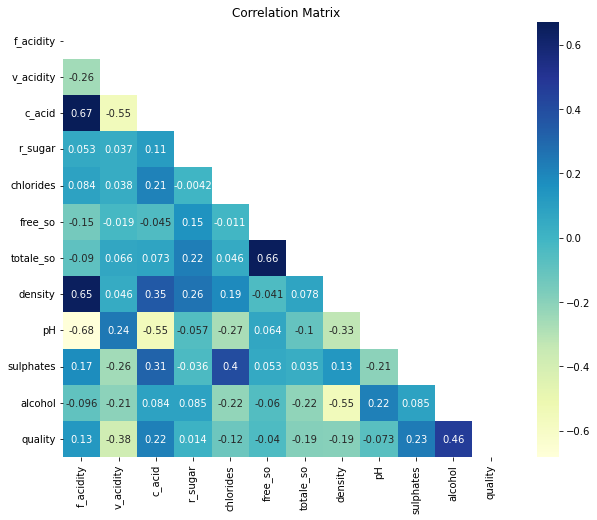

In [16]:
import numpy as np

cor = red_wine_data.toPandas().corr()
plt.figure(figsize = (10,8))
sns.heatmap(cor,mask=((np.triu(np.ones_like(cor)))),cmap="YlGnBu",annot=True)
plt.title("Correlation Matrix")


### III - Model - Training - Inference - Pipline

In [17]:
# features = ['f_acidity','v_acidity','c_acid','r_sugar','chlorides','free_so','totale_so',
#            'density','pH','sulphates','alcohol']


features = ['v_acidity','sulphates','alcohol']
label ='quality'
train_data,test_data = red_wine_data.randomSplit([0.7,0.3])

- selecting features with the best corr with the target

In [18]:
from pyspark.ml.feature import StandardScaler,VectorAssembler

# Train scalar and fit training_data
sdf= train_data
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")
assembler = VectorAssembler().setInputCols(features).setOutputCol("features")
sdf_transformed = assembler.transform(sdf)
scaler_model = scaler.fit(sdf_transformed.select("features"))
train_scaled = scaler_model.transform(sdf_transformed)
train_scaled.show()

+---------+---------+------+-------+---------+-------+---------+-------+----+---------+-------+-------+-----------------+--------------------+
|f_acidity|v_acidity|c_acid|r_sugar|chlorides|free_so|totale_so|density|  pH|sulphates|alcohol|quality|         features|      scaledFeatures|
+---------+---------+------+-------+---------+-------+---------+-------+----+---------+-------+-------+-----------------+--------------------+
|      4.6|     0.52|  0.15|    2.1|    0.054|    8.0|     65.0| 0.9934| 3.9|     0.56|   13.1|      4| [0.52,0.56,13.1]|[2.92916594532334...|
|      4.7|      0.6|  0.17|    2.3|    0.058|   17.0|    106.0| 0.9932|3.85|      0.6|   12.9|      6|   [0.6,0.6,12.9]|[3.37980685998847...|
|      4.9|     0.42|   0.0|    2.1|    0.048|   16.0|     42.0|0.99154|3.71|     0.74|   14.0|      7| [0.42,0.74,14.0]|[2.36586480199193...|
|      5.0|     0.38|  0.01|    1.6|    0.048|   26.0|     60.0|0.99084| 3.7|     0.75|   14.0|      6| [0.38,0.75,14.0]|[2.14054434465936...|

In [19]:
# use the Fittted Scalar to Scale Test data
sdf= test_data
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")
assembler = VectorAssembler().setInputCols(features).setOutputCol("features")
sdf_transformed = assembler.transform(sdf)
test_scaled = scaler_model.transform(sdf_transformed)
test_scaled.show()

+---------+---------+------+-------+---------+-------+---------+-------+----+---------+-------+-------+-----------------+--------------------+
|f_acidity|v_acidity|c_acid|r_sugar|chlorides|free_so|totale_so|density|  pH|sulphates|alcohol|quality|         features|      scaledFeatures|
+---------+---------+------+-------+---------+-------+---------+-------+----+---------+-------+-------+-----------------+--------------------+
|      5.0|      0.4|   0.5|    4.3|    0.046|   29.0|     80.0| 0.9902|3.49|     0.66|   13.6|      6|  [0.4,0.66,13.6]|[2.25320457332564...|
|      5.2|     0.34|   0.0|    1.8|     0.05|   27.0|     63.0| 0.9916|3.68|     0.79|   14.0|      6| [0.34,0.79,14.0]|[1.91522388732680...|
|      5.2|     0.48|  0.04|    1.6|    0.054|   19.0|    106.0| 0.9927|3.54|     0.62|   12.2|      7| [0.48,0.62,12.2]|[2.70384548799077...|
|      5.2|    0.645|   0.0|   2.15|     0.08|   15.0|     28.0|0.99444|3.78|     0.61|   12.5|      6|[0.645,0.61,12.5]|[3.63329237448760...|

In [20]:
train_scaled.toPandas().iloc[:,-2]

0       [0.52, 0.56, 13.1]
1         [0.6, 0.6, 12.9]
2       [0.42, 0.74, 14.0]
3       [0.38, 0.75, 14.0]
4       [0.42, 0.74, 14.0]
              ...         
802     [0.415, 0.8, 10.0]
803     [0.49, 0.93, 12.0]
804      [0.31, 0.79, 8.4]
805      [0.21, 0.84, 9.2]
806    [0.685, 0.68, 11.2]
Name: features, Length: 807, dtype: object

## Model : Decision Tree Classifier

In [21]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.util import MLUtils

labelIndexer = StringIndexer(inputCol="quality", outputCol="indexedLabel").fit(train_scaled)

featureIndexer =\
    VectorIndexer(inputCol="scaledFeatures", outputCol="indexedFeatures", maxCategories=10).fit(train_scaled)

# Train a DecisionTree model.
dt = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures",maxDepth=30, maxBins=20)

# Chain indexers and tree in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, dt])

# Train model.  This also runs the indexers.
model = pipeline.fit(train_scaled)

# Make predictions.
predictions = model.transform(test_scaled)

# Select example rows to display.
predictions.select("prediction", "indexedLabel", "features").show(6)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print ("Test Error = %g" % (1.0 - accuracy))

treeModel = model.stages[2]
print(treeModel) # summary only


+----------+------------+-----------------+
|prediction|indexedLabel|         features|
+----------+------------+-----------------+
|       1.0|         1.0|  [0.4,0.66,13.6]|
|       1.0|         1.0| [0.34,0.79,14.0]|
|       2.0|         2.0| [0.48,0.62,12.2]|
|       2.0|         1.0|[0.645,0.61,12.5]|
|       0.0|         1.0| [0.58,0.64,10.2]|
|       0.0|         0.0| [0.54,0.58,11.4]|
+----------+------------+-----------------+
only showing top 6 rows

Test Error = 0.465054
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_32f582858b9c, depth=17, numNodes=685, numClasses=6, numFeatures=3


## Model : Random forest Classifier

In [22]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="quality", outputCol="indexedLabel").fit(train_scaled)

# Automatically identify categorical features, and index them.
# Set maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(train_scaled)

# Train a RandomForest model.
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", numTrees=30)

# Convert indexed labels back to original labels.
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel",
                               labels=labelIndexer.labels)

# Chain indexers and forest in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, rf, labelConverter])

# Train model.  This also runs the indexers.
model = pipeline.fit(train_scaled)

# Make predictions.
predictions = model.transform(test_scaled)

# Select example rows to display.
predictions.select("predictedLabel", "indexedLabel", "indexedFeatures").show(6)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))

rfModel = model.stages[2]
print(rfModel)  # summary only

+--------------+------------+-----------------+
|predictedLabel|indexedLabel|  indexedFeatures|
+--------------+------------+-----------------+
|             6|         1.0|  [0.4,0.66,13.6]|
|             7|         1.0| [0.34,0.79,14.0]|
|             6|         2.0| [0.48,0.62,12.2]|
|             6|         1.0|[0.645,0.61,12.5]|
|             6|         1.0| [0.58,0.64,10.2]|
|             6|         0.0| [0.54,0.58,11.4]|
+--------------+------------+-----------------+
only showing top 6 rows

Test Error = 0.419355
RandomForestClassificationModel: uid=RandomForestClassifier_024dd74d1b22, numTrees=30, numClasses=6, numFeatures=3
